# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
cities_dict = {
    "city": cities
}
city_list = pd.DataFrame(cities_dict)
city_list

,city
0,yellowknife
1,georgetown
2,krasnyy yar
3,kavaratti
4,grand river south east
...,...
630,sept-iles
631,fare
632,luanda
633,dingle


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.

weather = []

print("Beginning Data Retrieval")
print("---------------------------")

rec = 0
sets = 1

for city in cities:
    rec += 1
    print(f"Processing Record {rec} of Set {sets} | {city}")
    
    if rec == 50:
        sets += 1
        rec = 0
        
    try:
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
        response = requests.get(url).json()
        weather.append({
            "City": city,
            "Lat": response["coord"]["lat"],
            "Long": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Wind": response["wind"]["speed"],
            "Cloudiness": response["clouds"]["all"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })
    except:
        print("City not found. Skipping...")
        pass                        

print('-----------------------------\nData Retrieval Complete\n-----------------------------')


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | krasnyy yar
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | umm durman
City not found. Skipping...
Processing Record 9 of Set 1 | banting
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | houlton
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | muswellbrook
Processing Record 16 of Set 1 | vila do maio
Processing Record 17 of Set 1 | shiloh
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | rikitea
Processing Record 2

Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | kautokeino
Processing Record 41 of Set 4 | karasjok
Processing Record 42 of Set 4 | deputatskiy
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | emerald
Processing Record 45 of Set 4 | chagda
City not found. Skipping...
Processing Record 46 of Set 4 | chaozhou
Processing Record 47 of Set 4 | batagay
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | verkhnevilyuysk
Processing Record 50 of Set 4 | oktyabrskiy
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | lockhart
Processing Record 4 of Set 5 | coracao de jesus
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | koumac
Processing Record 7 of Set 5 | dikson
Processing Record 8 of Set 5 | pitimbu
Processing Record 9 of Set 5 | santa cruz
Processing Record 10 of Set 5 | radhanpur
Processing Record 11 of S

Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | morogoro
Processing Record 31 of Set 8 | maltahohe
Processing Record 32 of Set 8 | pauini
Processing Record 33 of Set 8 | leh
Processing Record 34 of Set 8 | new ulm
Processing Record 35 of Set 8 | marathon
Processing Record 36 of Set 8 | bengkulu
Processing Record 37 of Set 8 | saleaula
City not found. Skipping...
Processing Record 38 of Set 8 | enumclaw
Processing Record 39 of Set 8 | warwick
Processing Record 40 of Set 8 | ilulissat
Processing Record 41 of Set 8 | presidente epitacio
Processing Record 42 of Set 8 | whitehorse
Processing Record 43 of Set 8 | chabahar
Processing Record 44 of Set 8 | murdochville
Processing Record 45 of Set 8 | havelock
Processing Record 46 of Set 8 | rocky mountain house
Processing Record 47 of Set 8 | kant
Processing Record 48 of Set 8 | tiznit
Processing Record 49 of Set 8 | humaita
Processing Record 50 of Set 8 | kati
Processing Record 1 of Set 9 | attawapiskat
City not foun

Processing Record 16 of Set 12 | burnie
Processing Record 17 of Set 12 | chagoda
Processing Record 18 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 12 | kingston
Processing Record 20 of Set 12 | weihai
Processing Record 21 of Set 12 | oyama
Processing Record 22 of Set 12 | gainesville
Processing Record 23 of Set 12 | havre-saint-pierre
Processing Record 24 of Set 12 | hokitika
Processing Record 25 of Set 12 | acarau
Processing Record 26 of Set 12 | sola
Processing Record 27 of Set 12 | sioux lookout
Processing Record 28 of Set 12 | pennagaram
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 31 of Set 12 | haukipudas
Processing Record 32 of Set 12 | marsa matruh
Processing Record 33 of Set 12 | broken hill
Processing Record 34 of Set 12 | mitzic
Processing Record 35 of Set 12 | hassleholm
Processing Record 36 of Set 12 | neiafu
Processing Record 37 of Set 12 | syedove
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Display the DataFrame
city_df = pd.DataFrame(weather)
city_df.head()

,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,yellowknife,62.4560,-114.3525,5.00,85,4.61,90,CA,1610998592
1,georgetown,5.4112,100.3354,78.80,78,6.91,20,MY,1610998538
2,krasnyy yar,46.5331,48.3456,15.80,79,13.42,75,RU,1610998759
3,kavaratti,10.5669,72.6420,81.37,71,2.30,0,IN,1610998759
4,ushuaia,-54.8000,-68.3000,51.80,66,12.66,75,AR,1610998597


In [6]:
# Export Dataframe into a .csv
city_df.to_csv("cities.csv", index=False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# hum_del = city_df.loc[(city_df["Humidity"])>100]
# print(hum_del)
hum_del_df=city_df.describe()
hum_del_df

,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.839845,17.495217,48.126843,71.778157,8.276109,53.124573,1.610999e+09
std,34.158665,89.792179,34.379839,20.888273,5.860941,40.065628,8.626504e+01
min,-54.800000,-175.200000,-56.180000,2.000000,0.290000,0.000000,1.610998e+09
25%,-8.744275,-63.048550,28.400000,62.000000,3.440000,6.000000,1.610999e+09
50%,24.783600,16.625000,60.555000,77.000000,6.910000,62.500000,1.610999e+09
75%,50.417500,93.599975,77.000000,87.000000,11.500000,91.000000,1.610999e+09
max,78.218600,179.316700,96.010000,100.000000,33.240000,100.000000,1.610999e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# N/A 

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data_df = city_df.copy(deep=True)
clean_city_data_df

quartiles = clean_city_data_df["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

hum_clean_df = clean_city_data_df.loc[(clean_city_data_df["Humidity"] < lower_bound) | (clean_city_data_df["Humidity"] > upper_bound)]
hum_clean_df.head()



The lower quartile of occupancy is: 62.0
The upper quartile of occupancy is: 87.0
The interquartile range of occupancy is: 25.0
The the median of occupancy is: 77.0 
Values below 24.5 could be outliers.
Values above 124.5 could be outliers.


,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
42,mongo,12.1844,18.6930,72.18,20,7.43,0,TD,1610998771
44,kerouane,9.2667,-9.0167,76.19,18,3.04,0,GN,1610998771
82,touba,8.2833,-7.6833,79.18,17,1.50,6,CI,1610998780
155,kolondieba,11.0882,-6.8926,78.76,16,4.47,0,ML,1610998799
196,tahoua,14.8888,5.2692,73.72,19,12.03,52,NE,1610998811


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

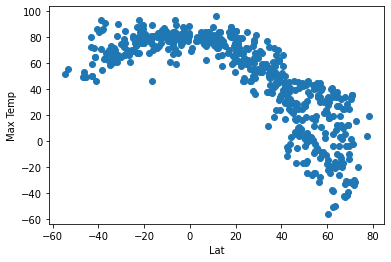

In [22]:
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression